## Analysis Starts here

In [295]:
import pandas as pd
path = "Jan3_2022_Pred/14DayWin_7DayPred/"
x_train = pd.read_csv(path+"x_train.csv",index_col=0)
y_train = pd.read_csv(path+"y_train.csv",index_col=0)

x_val = pd.read_csv(path+"x_val.csv",index_col=0)
y_val = pd.read_csv(path+"y_val.csv",index_col=0)

x_test = pd.read_csv(path+"x_test.csv",index_col=0)
y_test = pd.read_csv(path+"y_test.csv",index_col=0)

### Training Model for only Cases Prediction

In [296]:
y_train = y_train.iloc[:,[1,3,5,7,9,11,13]]
y_val = y_val.iloc[:,[1,3,5,7,9,11,13]]
y_test = y_test.iloc[:,[1,3,5,7,9,11,13]]

In [297]:
y_train

,metrics.caseDensity(t),metrics.caseDensity(t+1),metrics.caseDensity(t+2),metrics.caseDensity(t+3),metrics.caseDensity(t+4),metrics.caseDensity(t+5),metrics.caseDensity(t+6)
date,,,,,,,
2020-04-19,-1.075018,-1.069245,-1.063814,-1.056244,-1.047694,-1.034272,-1.021227
2020-04-20,-1.069245,-1.063814,-1.056244,-1.047694,-1.034272,-1.021227,-1.020043
2020-04-21,-1.063814,-1.056244,-1.047694,-1.034272,-1.021227,-1.020043,-1.017310
2020-04-22,-1.056244,-1.047694,-1.034272,-1.021227,-1.020043,-1.017310,-1.017571
2020-04-23,-1.047694,-1.034272,-1.021227,-1.020043,-1.017310,-1.017571,-1.015028
...,...,...,...,...,...,...,...
2021-08-26,1.201469,1.252444,1.293391,1.336629,1.378909,1.438982,1.489022
2021-08-27,1.252444,1.293391,1.336629,1.378909,1.438982,1.489022,1.514540
2021-08-28,1.293391,1.336629,1.378909,1.438982,1.489022,1.514540,1.551361


In [298]:
x_test.columns

Index(['actuals.cases(t-14)', 'actuals.deaths(t-14)',
       'metrics.deathDensity(t-14)', 'metrics.caseDensity(t-14)',
       'metrics.testPositivityRatio(t-14)', 'cdcTransmissionLevel(t-14)',
       'riskLevels.caseDensity(t-14)', 'riskLevels.overall(t-14)',
       'metrics.vaccinationsCompletedRatio(t-14)',
       'metrics.vaccinationsInitiatedRatio(t-14)',
       ...
       'actuals.cases(t-1)', 'actuals.deaths(t-1)',
       'metrics.deathDensity(t-1)', 'metrics.caseDensity(t-1)',
       'metrics.testPositivityRatio(t-1)', 'cdcTransmissionLevel(t-1)',
       'riskLevels.caseDensity(t-1)', 'riskLevels.overall(t-1)',
       'metrics.vaccinationsCompletedRatio(t-1)',
       'metrics.vaccinationsInitiatedRatio(t-1)'],
      dtype='object', length=140)

In [299]:
## RESHAPE
def reshape_data(data, timesteps=1):

    #reshape input to be 3D [samples, timesteps, features]
    np_values = data.values
    new_data = np_values.reshape((np_values.shape[0], timesteps, np_values.shape[1]))
    
    return new_data

X_train= reshape_data(x_train,1)
X_val= reshape_data(x_val,1)
Y_train= reshape_data(y_train,1)
Y_val= reshape_data(y_val,1)

In [300]:
Y_val.shape

(125, 1, 7)

In [301]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
from numpy.random import seed
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Concatenate, LSTM, Dropout, Lambda, Bidirectional
from keras.models import Model
from keras import backend as K #For explicitly adjusting the learning rate
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras import Sequential

# from tensorflow import keras
import tensorflow.keras.backend as K


In [302]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [303]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [304]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_root_mean_squared_error', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-10)

# optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
optimizer = 'adam'

loss_fn = root_mean_squared_error
# loss_fn = 'mse'

model = Sequential()
# model.add(LSTM(128,  activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(128, activation='relu', dropout=0.2), input_shape=(X_train.shape[1],X_train.shape[2])))
# model.add(LSTM(128,  activation='relu', return_sequences=True))
model.add(Dense(32, activation="relu"))
# model.add(Dropout(0.2)) 
model.add(Dense(7)) #Output Variables
model.compile(loss=loss_fn, optimizer=optimizer,metrics = [loss_fn,'mean_squared_error','mean_absolute_percentage_error','mean_absolute_error'])
model.summary()
# fit network

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              275456    
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                8224      
                                                                 
 dense_1 (Dense)             (None, 7)                 231       
                                                                 
Total params: 283,911
Trainable params: 283,911
Non-trainable params: 0
_________________________________________________________________


In [305]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=100, batch_size=16,  verbose=1, shuffle=False ,callbacks=[learning_rate_reduction])

Epoch 1/100
32/32 [==============================] - 3s 29ms/step - loss: 0.6143 - root_mean_squared_error: 0.6250 - mean_squared_error: 0.5771 - mean_absolute_percentage_error: 101.5352 - mean_absolute_error: 0.5665 - val_loss: 0.6635 - val_root_mean_squared_error: 0.6920 - val_mean_squared_error: 0.5740 - val_mean_absolute_percentage_error: 113.2427 - val_mean_absolute_error: 0.5504 - lr: 0.0010
Epoch 2/100
32/32 [==============================] - 1s 20ms/step - loss: 0.4013 - root_mean_squared_error: 0.4039 - mean_squared_error: 0.2066 - mean_absolute_percentage_error: 89.8933 - mean_absolute_error: 0.3406 - val_loss: 0.7437 - val_root_mean_squared_error: 0.7555 - val_mean_squared_error: 0.5813 - val_mean_absolute_percentage_error: 207.3622 - val_mean_absolute_error: 0.6188 - lr: 0.0010
Epoch 3/100
32/32 [==============================] - 1s 20ms/step - loss: 0.4697 - root_mean_squared_error: 0.4878 - mean_squared_error: 0.2983 - mean_absolute_percentage_error: 89.9081 - mean_absolu

31/32 [============================>.] - ETA: 0s - loss: 0.3102 - root_mean_squared_error: 0.3102 - mean_squared_error: 0.2334 - mean_absolute_percentage_error: 58.3760 - mean_absolute_error: 0.2496
Epoch 19: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
32/32 [==============================] - 1s 20ms/step - loss: 0.3099 - root_mean_squared_error: 0.3086 - mean_squared_error: 0.2332 - mean_absolute_percentage_error: 58.3248 - mean_absolute_error: 0.2496 - val_loss: 0.5453 - val_root_mean_squared_error: 0.5636 - val_mean_squared_error: 0.3708 - val_mean_absolute_percentage_error: 142.8142 - val_mean_absolute_error: 0.4570 - lr: 1.2500e-04
Epoch 20/100
32/32 [==============================] - 1s 20ms/step - loss: 0.3083 - root_mean_squared_error: 0.3083 - mean_squared_error: 0.2290 - mean_absolute_percentage_error: 57.8805 - mean_absolute_error: 0.2481 - val_loss: 0.5676 - val_root_mean_squared_error: 0.5850 - val_mean_squared_error: 0.3928 - val_mean_absolute_percen

32/32 [==============================] - 1s 20ms/step - loss: 0.2983 - root_mean_squared_error: 0.2960 - mean_squared_error: 0.2154 - mean_absolute_percentage_error: 57.8766 - mean_absolute_error: 0.2380 - val_loss: 0.5806 - val_root_mean_squared_error: 0.5975 - val_mean_squared_error: 0.4063 - val_mean_absolute_percentage_error: 154.1604 - val_mean_absolute_error: 0.4933 - lr: 1.9531e-06
Epoch 36/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2981 - root_mean_squared_error: 0.2961 - mean_squared_error: 0.2151 - mean_absolute_percentage_error: 58.1551 - mean_absolute_error: 0.2374 - val_loss: 0.5804 - val_root_mean_squared_error: 0.5973 - val_mean_squared_error: 0.4061 - val_mean_absolute_percentage_error: 154.0875 - val_mean_absolute_error: 0.4931 - lr: 1.9531e-06
Epoch 37/100
31/32 [============================>.] - ETA: 0s - loss: 0.2988 - root_mean_squared_error: 0.2988 - mean_squared_error: 0.2157 - mean_absolute_percentage_error: 57.8170 - mean_absolute_error

Epoch 52/100
31/32 [============================>.] - ETA: 0s - loss: 0.3006 - root_mean_squared_error: 0.3006 - mean_squared_error: 0.2158 - mean_absolute_percentage_error: 58.1716 - mean_absolute_error: 0.2403
Epoch 52: ReduceLROnPlateau reducing learning rate to 3.051757957450718e-08.
32/32 [==============================] - 1s 20ms/step - loss: 0.2999 - root_mean_squared_error: 0.2973 - mean_squared_error: 0.2156 - mean_absolute_percentage_error: 58.1173 - mean_absolute_error: 0.2402 - val_loss: 0.5801 - val_root_mean_squared_error: 0.5970 - val_mean_squared_error: 0.4058 - val_mean_absolute_percentage_error: 153.9596 - val_mean_absolute_error: 0.4928 - lr: 6.1035e-08
Epoch 53/100
32/32 [==============================] - 1s 19ms/step - loss: 0.2969 - root_mean_squared_error: 0.2943 - mean_squared_error: 0.2137 - mean_absolute_percentage_error: 57.3224 - mean_absolute_error: 0.2372 - val_loss: 0.5801 - val_root_mean_squared_error: 0.5970 - val_mean_squared_error: 0.4058 - val_mean_a

32/32 [==============================] - 1s 20ms/step - loss: 0.2956 - root_mean_squared_error: 0.2932 - mean_squared_error: 0.2150 - mean_absolute_percentage_error: 55.6062 - mean_absolute_error: 0.2359 - val_loss: 0.5801 - val_root_mean_squared_error: 0.5970 - val_mean_squared_error: 0.4058 - val_mean_absolute_percentage_error: 153.9504 - val_mean_absolute_error: 0.4927 - lr: 9.5367e-10
Epoch 69/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2977 - root_mean_squared_error: 0.2954 - mean_squared_error: 0.2161 - mean_absolute_percentage_error: 56.3733 - mean_absolute_error: 0.2381 - val_loss: 0.5801 - val_root_mean_squared_error: 0.5970 - val_mean_squared_error: 0.4058 - val_mean_absolute_percentage_error: 153.9504 - val_mean_absolute_error: 0.4927 - lr: 9.5367e-10
Epoch 70/100
29/32 [==========================>...] - ETA: 0s - loss: 0.2899 - root_mean_squared_error: 0.2899 - mean_squared_error: 0.2186 - mean_absolute_percentage_error: 49.2028 - mean_absolute_error

Epoch 86/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2995 - root_mean_squared_error: 0.2967 - mean_squared_error: 0.2148 - mean_absolute_percentage_error: 57.5498 - mean_absolute_error: 0.2389 - val_loss: 0.5801 - val_root_mean_squared_error: 0.5970 - val_mean_squared_error: 0.4058 - val_mean_absolute_percentage_error: 153.9504 - val_mean_absolute_error: 0.4927 - lr: 1.0000e-10
Epoch 87/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2993 - root_mean_squared_error: 0.2970 - mean_squared_error: 0.2166 - mean_absolute_percentage_error: 58.3316 - mean_absolute_error: 0.2399 - val_loss: 0.5801 - val_root_mean_squared_error: 0.5970 - val_mean_squared_error: 0.4058 - val_mean_absolute_percentage_error: 153.9504 - val_mean_absolute_error: 0.4927 - lr: 1.0000e-10
Epoch 88/100
32/32 [==============================] - 1s 21ms/step - loss: 0.2983 - root_mean_squared_error: 0.2967 - mean_squared_error: 0.2145 - mean_absolute_percentage_error: 57.2285 - m

dict_keys(['loss', 'root_mean_squared_error', 'mean_squared_error', 'mean_absolute_percentage_error', 'mean_absolute_error', 'val_loss', 'val_root_mean_squared_error', 'val_mean_squared_error', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'lr'])


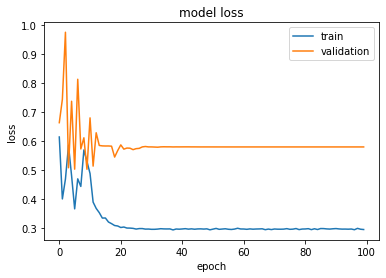

In [306]:
#Visualizing the Loss over epochs
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [307]:
model.evaluate(X_val,Y_val) #Results from MSE

4/4 [==============================] - 0s 5ms/step - loss: 0.6656 - root_mean_squared_error: 0.6749 - mean_squared_error: 0.5047 - mean_absolute_percentage_error: 178.5562 - mean_absolute_error: 0.5329


[0.6656133532524109,
 0.6748852133750916,
 0.5047189593315125,
 178.55621337890625,
 0.5329447984695435]

In [308]:
model.evaluate(reshape_data(x_test, timesteps=1),reshape_data(y_test, timesteps=1))

1/1 [==============================] - 0s 23ms/step - loss: 2.1056 - root_mean_squared_error: 2.1056 - mean_squared_error: 4.4334 - mean_absolute_percentage_error: 47.3234 - mean_absolute_error: 2.0027


[2.105557680130005,
 2.105557680130005,
 4.433372974395752,
 47.3233642578125,
 2.0026509761810303]

In [309]:
model.evaluate(X_val,Y_val) 

4/4 [==============================] - 0s 5ms/step - loss: 0.6656 - root_mean_squared_error: 0.6749 - mean_squared_error: 0.5047 - mean_absolute_percentage_error: 178.5562 - mean_absolute_error: 0.5329


[0.6656133532524109,
 0.6748852133750916,
 0.5047189593315125,
 178.55621337890625,
 0.5329447984695435]

In [310]:
model.evaluate(reshape_data(x_test, timesteps=1),reshape_data(y_test, timesteps=1))

1/1 [==============================] - 0s 22ms/step - loss: 2.1056 - root_mean_squared_error: 2.1056 - mean_squared_error: 4.4334 - mean_absolute_percentage_error: 47.3234 - mean_absolute_error: 2.0027


[2.105557680130005,
 2.105557680130005,
 4.433372974395752,
 47.3233642578125,
 2.0026509761810303]

In [311]:
col = y_test.columns
y_pred = model.predict(reshape_data(x_test, timesteps=1))
y_pred_df=pd.DataFrame()
y_pred_df[col] = y_pred
y_pred_df.index = y_test.index
y_pred_df.head()

,metrics.caseDensity(t),metrics.caseDensity(t+1),metrics.caseDensity(t+2),metrics.caseDensity(t+3),metrics.caseDensity(t+4),metrics.caseDensity(t+5),metrics.caseDensity(t+6)
date,,,,,,,
2022-01-03,2.066771,1.843275,2.312389,1.577015,2.44255,2.283105,2.35925


In [312]:
y_test.head()

,metrics.caseDensity(t),metrics.caseDensity(t+1),metrics.caseDensity(t+2),metrics.caseDensity(t+3),metrics.caseDensity(t+4),metrics.caseDensity(t+5),metrics.caseDensity(t+6)
date,,,,,,,
2022-01-03,2.998285,3.382862,3.773047,4.139958,4.579833,4.882025,5.1469


## Rescaling the value and Plotting


In [313]:
import json
file_path = "daily_data_scaling_inforamtion.json"
with open (file_path) as file:
    data = json.load(file)
cases_mean = data['cases_mean']
cases_std = data['cases_std']
cases_mean, cases_std

(87708.1127131783, 69948.04441944878)

In [314]:
def rescaling_cases(df,cases_mean,cases_std):
    rescaled_df = pd.DataFrame()
    for feature in df.columns:
        rescaled_df[[feature]] = (df[[feature]]*cases_std) + cases_mean
    return rescaled_df
        
rescaled_y_test = rescaling_cases(y_test,cases_mean,cases_std)
rescaled_y_pred_df = rescaling_cases(y_pred_df,cases_mean,cases_std)

In [315]:
rescaled_y_pred_df.shape

(1, 7)

In [316]:
rescaled_y_test.shape

(1, 7)

In [317]:
def create_weekly_prediction(df): 
    indices = df.index.tolist()

    results = []
    for index in range(len(indices)):
        if index ==0 or (index+1)%7==0:
            results+=df.loc[indices[index]].tolist()
             
    results = results[0:len(indices)] #Removing the last few indices that are not available for the original data
    new_df = pd.DataFrame()
    new_df.index = df.index        
    new_df['metrics.caseDensity(t)']=results
    
    return new_df

weekly_rescaled_y_test = create_weekly_prediction(rescaled_y_test)
weekly_rescaled_y_pred_df = create_weekly_prediction(rescaled_y_pred_df)

In [318]:
weekly_rescaled_y_test, weekly_rescaled_y_pred_df

(            metrics.caseDensity(t)
 date                              
 2022-01-03                297432.3,
             metrics.caseDensity(t)
 date                              
 2022-01-03             232274.6875)

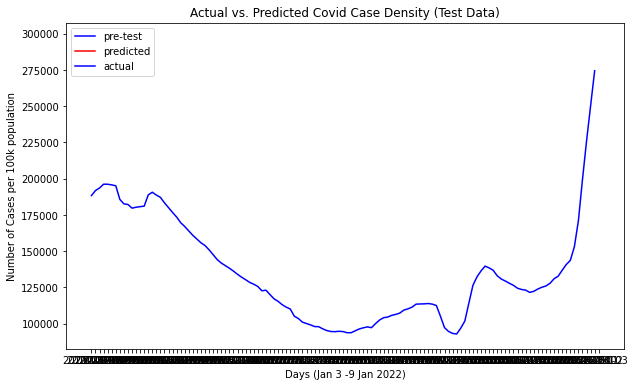

In [319]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(rescaling_cases(y_val,cases_mean,cases_std)['metrics.caseDensity(t)'], color='blue')
plt.plot(weekly_rescaled_y_pred_df['metrics.caseDensity(t)'], color='red')
plt.plot(weekly_rescaled_y_test['metrics.caseDensity(t)'], color='blue')
plt.title('Actual vs. Predicted Covid Case Density (Test Data)')
plt.ylabel('Number of Cases per 100k population')
plt.xlabel('Days (Jan 3 -9 Jan 2022)')
plt.legend(['pre-test','predicted', 'actual'])

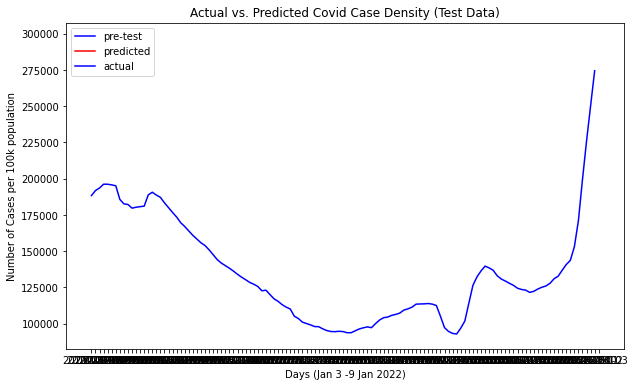

In [320]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(rescaling_cases(y_val,cases_mean,cases_std)['metrics.caseDensity(t)'], color='blue')
plt.plot(rescaled_y_pred_df['metrics.caseDensity(t)'], color='red')
plt.plot(rescaled_y_test['metrics.caseDensity(t)'], color='blue')
plt.title('Actual vs. Predicted Covid Case Density (Test Data)')
plt.ylabel('Number of Cases per 100k population')
plt.xlabel('Days (Jan 3 -9 Jan 2022)')
plt.legend(['pre-test','predicted', 'actual'])

In [294]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,6))
# plt.plot(y_pred_df['metrics.deathDensity(t)'], color='red')
# plt.plot(y_test['metrics.deathDensity(t)'], color='blue')
# plt.title('Actual vs. Predicted Covid Death Density (Test Data)')
# plt.ylabel('Deaths/Population (Scaled)')
# plt.xlabel('Days (5 Aug 2021 - 9 Jan 2022)')
# plt.legend(['predicted', 'actual'])